In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
data = pd.read_csv('/content/HeartDiesease.csv')
data.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [103]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [104]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [105]:
data.isnull().any()

age                    False
sex                    False
chest pain type        False
resting bp s           False
cholesterol            False
fasting blood sugar    False
resting ecg            False
max heart rate         False
exercise angina        False
oldpeak                False
ST slope               False
target                 False
dtype: bool



```
# This is formatted as code
```

# Univariate feature analysis

### Age & Gender:

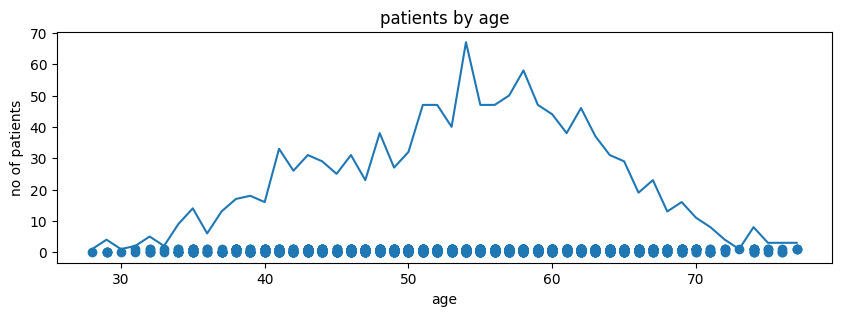

In [106]:
# scatter plot - age releated with heart disease
plt.figure(figsize=(10,3))
plt.xlabel("age in years")
plt.ylabel("no of patients")
plt.title("patients by age")
plt.scatter(x="age",y="target",data=data)
data.groupby("age")["target"].count().plot()
plt.show()

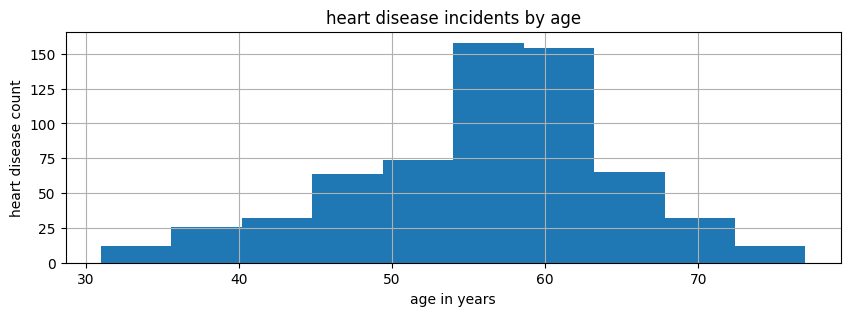

In [107]:
plt.figure(figsize=(10,3))
plt.xlabel("age in years")
plt.ylabel("heart disease count")
plt.title("heart disease incidents by age")
data.loc[data["target"]==1]["age"].hist()
plt.show()

#### **Observations** :
1. age b/w 50-65 years have highest no of heart diseases recorded

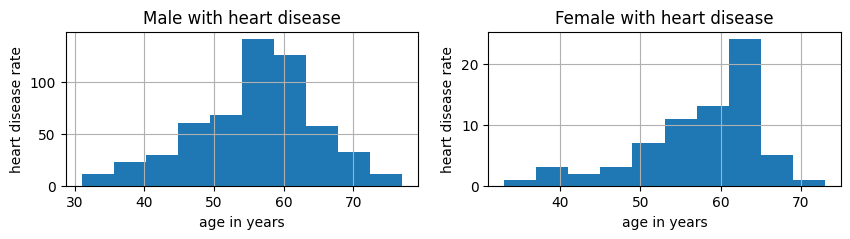

In [232]:
plt.figure(figsize=(10,2))
plt.subplot(1, 2, 1)
# Male heart disease data distribution
plt.xlabel('age in years')
plt.ylabel('heart disease rate')
plt.title('Male with heart disease')
data.loc[(data["sex"]==1) & (data['target']==1)]["age"].hist()

# Female heart disease data distribution
plt.subplot(1, 2, 2)
plt.xlabel('age in years')
plt.ylabel('heart disease rate')
plt.title('Female with heart disease')
data.loc[(data["sex"]==0) & (data['target']==1)]["age"].hist()
plt.show()

In [109]:
male_heartdisease_ratio=(data.loc[(data["sex"]==1) & (data['target']==1)]["target"].count()/data.shape[0])*100
female_heartdisease_ratio=(data.loc[(data["sex"]==0) & (data['target']==1)]["target"].count()/data.shape[0])*100
male_heartdisease_ratio = format(male_heartdisease_ratio, '.2f')
female_heartdisease_ratio = format(female_heartdisease_ratio, '.2f')
print("Male heart disease ratio :",male_heartdisease_ratio+" %")
print("Female heart disease ratio :",female_heartdisease_ratio+" %")

Male heart disease ratio : 46.97 %
Female heart disease ratio : 5.88 %


#### **Observations** :
1. Males have highest no of heart diseases approx. 47%

In [236]:
mens_lifestyle_disorder=data.loc[(data["sex"]==1) & (data["resting bp s"]>140) & (data['fasting blood sugar']==1) & (data['target']==1)]["target"].count()
female_lifestyle_disorder=data.loc[(data["sex"]==0) & (data["resting bp s"]>140) & (data['fasting blood sugar']==1) & (data['target']==1)]["target"].count()
print("Life style disorders (bp + diabetic) in mens    :{}".format(mens_lifestyle_disorder))
print("Life style disorders (bp + diabetic) in females :{}".format(female_lifestyle_disorder))

Life style disorders (bp + diabetic) in mens    :53
Life style disorders (bp + diabetic) in females :7


#### **Observations**:
1. Males have highest heart disease rate due to life style disorder like high bp and diabetic

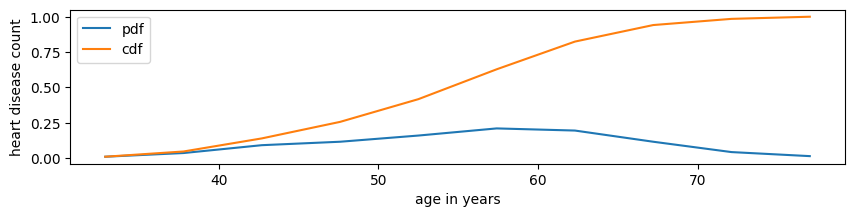

In [212]:
plt.figure(figsize=(10,2))
plt.xlabel("age in years")
plt.ylabel("heart disease count")
hist,bin_edges=np.histogram(data["age"],bins=10,density=True)
pdf=hist/sum(hist)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf")
plt.plot(bin_edges[1:],cdf,label="cdf")
plt.legend()
plt.show()

#### Observations:
1. approx 25-26% of patients age <= 50
2. This data collection have old adults

### Chest pain:

###### 4 types of chest pain
**type 1** : typical angina  [angina is a symptom of coronary artery disease,symptoms like heaviness, tightness in chest]

**type 2** : atypical angina [ pressure or squeezing like sensation in heart muscle doesn't get an adequate supply of oxygenated blood ]

**type 3** : non-anginal pain [pain without heart disease]

**type 4** : asymptomatic [showing no symptoms]

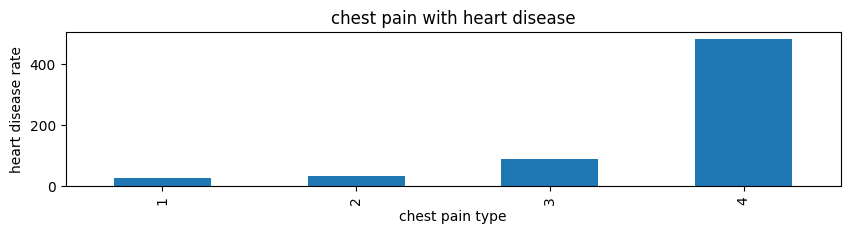

In [234]:
plt.figure(figsize=(10,2))
plt.xlabel('chest pain type')
plt.ylabel('heart disease rate')
plt.title('chest pain with heart disease')
data.loc[data["target"]==1].groupby("chest pain type")["target"].count().plot(kind="bar")
plt.show()

#### Observation:
1. Most of patients gets heart disease with out knowing any sympotoms

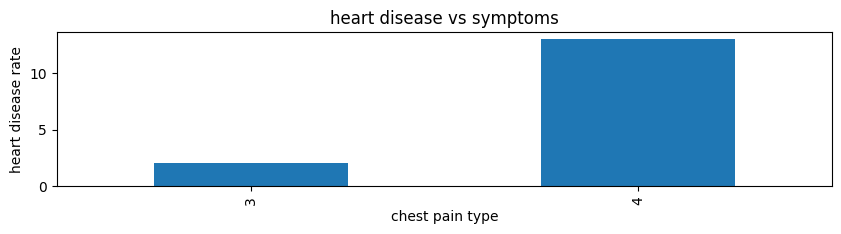

In [258]:
plt.figure(figsize=(10,2))
plt.xlabel('chest pain type')
plt.ylabel('heart disease rate')
plt.title('heart disease vs symptoms')
data.loc[(data["target"]==1) & (data['resting bp s']) & (data["cholesterol"]>240) & (data['fasting blood sugar']==1)].groupby("chest pain type")["target"].count().plot(kind="bar")
plt.show()

In [242]:
data.loc[(data["target"]==1) & (data['resting bp s']) & (data["cholesterol"]>240) & (data['fasting blood sugar']==1)].groupby("chest pain type")["target"].count()

chest pain type
3     2
4    13
Name: target, dtype: int64

#### Observations:
1. silent killer - Risk factors, if a person have bp,diabetic and cholesterol, leads a heart disease without any symptoms.

### Blood pressure & fasting blood sugar :

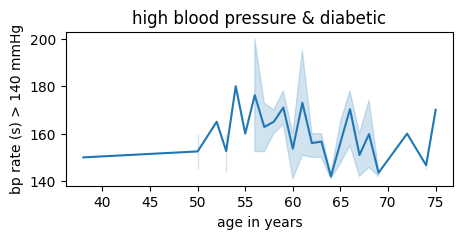

In [270]:
plt.figure(figsize=(5,2))
plt.xlabel('age in years')
plt.ylabel('bp rate (s) > 140 mmHg')
plt.title('high blood pressure & diabetic')
df1=data.loc[(data["resting bp s"]>140) & (data["target"]==1) & (data["fasting blood sugar"]==1)]
sns.lineplot(data=df1,x="age",y="resting bp s")
plt.show()

#### Observations:
1. Once age > 50 people have high blood pressure >140 mmHg and diabetic which main causes dieases.

### Cholesterol:

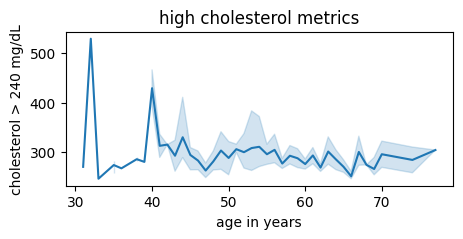

In [269]:
plt.figure(figsize=(5,2))
plt.xlabel('age in years')
plt.ylabel('cholesterol > 240 mg/dL')
plt.title('high cholesterol metrics')
df1=data.loc[(data["cholesterol"]>240) & (data["target"]==1)]
sns.lineplot(data=df1,x="age",y="cholesterol")
plt.show()

#### Observations:
1. young age [usually eairing peoples] patients in years b/w 33-43 have high cholestrol levels, because of no excersise & stress could be main cause in heart disease.

# Multivariate feature analysis

In [289]:
df1=data.loc[:,data.columns.isin(["age","resting bp s","cholesterol","fasting blood sugar","exercise angina","target"])]

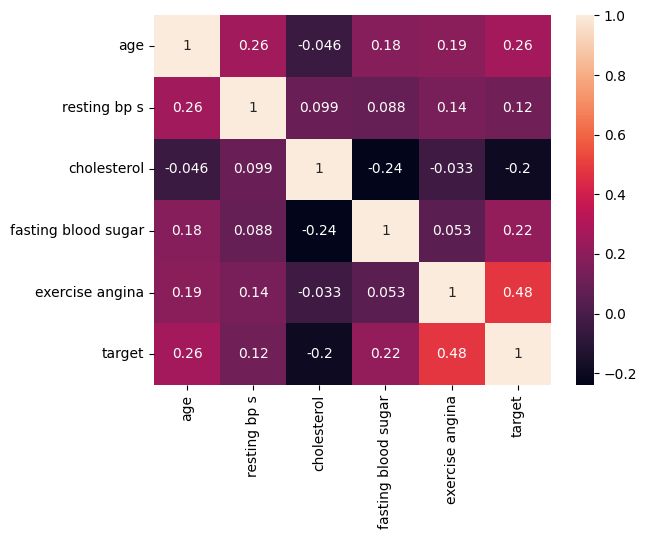

In [290]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

#### Observation:
1. exercise angina & age are highly corrected with target.Means as age increase, getting chest pain may lead heart disease.